In [2]:
# Menghubungkan Google Drive ke Google Colab untuk akses penyimpanan data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mengubah direktori kerja ke folder di Google Drive
%cd /content/drive/MyDrive/Semester/Sem 5/Research Methodology in Computer Science/Kelompok 17

/content/drive/MyDrive/Semester/Sem 5/Research Methodology in Computer Science/Kelompok 17


In [4]:
# Mengimpor library yang diperlukan
import warnings  # Library untuk mengatur dan menyaring peringatan
import numpy as np  # Library untuk operasi numerik pada array
import pandas as pd  # Library untuk manipulasi dan analisis data
import seaborn as sns  # Library untuk visualisasi data berbasis matplotlib
import matplotlib.pyplot as plt  # Library inti untuk membuat visualisasi data

# Menonaktifkan peringatan agar tidak mengganggu output
warnings.filterwarnings('ignore')


In [5]:
# Mengimpor modul 'files' dari 'google.colab' untuk mengupload file
from google.colab import files

# Memanggil fungsi 'upload' untuk mengupload file dari komputer pengguna
uploaded = files.upload()

Saving StudentPerformance.csv to StudentPerformance (2).csv


# Exploratory Data Analysis

In [6]:
# Membaca dataset
df = pd.read_csv("StudentPerformance.csv")

In [7]:
# Menampilkan beberapa baris pertama
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape

(395, 33)

In [9]:
# Menampilkan informasi ringkas tentang dataset
# Termasuk jumlah entri, jumlah kolom, nama kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
# Menghitung jumlah nilai yang hilang (null) pada setiap kolom dalam DataFrame
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [11]:
# Mengecek jumlah data duplikat dalam dataframe
df.duplicated().value_counts()

,count
False,395


In [13]:
# Menghitung jumlah nilai unik yang ada di setiap kolom dalam DataFrame
df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [12]:
# Menampilkan statistik deskriptif dari DataFrame untuk kolom numerik
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


    failures  age  count
0          0   15     71
1          0   16     88
2          0   17     84
3          0   18     63
4          0   19      5
5          0   20      1
6          1   15      3
7          1   16     10
8          1   17      8
9          1   18     16
10         1   19     13
11         2   15      5
12         2   16      4
13         2   17      2
14         2   18      1
15         2   19      3
16         2   20      2
17         3   15      3
18         3   16      2
19         3   17      4
20         3   18      2
21         3   19      3
22         3   21      1
23         3   22      1


Text(0, 0.5, 'Age')

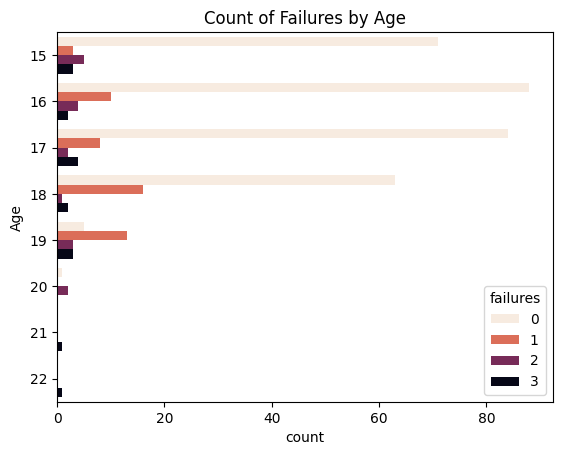

In [14]:
# Mengelompokkan DataFrame berdasarkan kolom 'failures' dan 'age',
# Menghitung jumlah kemunculan masing-masing kombinasi, dan mereset index
failure_counts = df.groupby(["failures", "age"]).size().reset_index(name="count")

# Menampilkan DataFrame yang menunjukkan jumlah kegagalan ('failures') berdasarkan usia ('age')
print(failure_counts)

# Membuat plot count menggunakan seaborn untuk menampilkan jumlah 'failures',
# dibedakan berdasarkan 'age' dan ditampilkan secara horizontal
sns.countplot(data=df, y='age', hue='failures', palette="rocket_r")

# Menetapkan judul untuk plot
plt.title('Count of Failures by Age')

# Memberikan label untuk sumbu y
plt.ylabel('Age')


Text(50.722222222222214, 0.5, 'Jumlah Kegagalan')

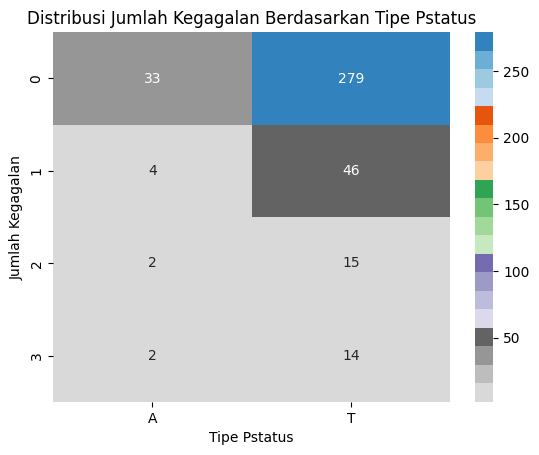

In [15]:
# Membuat pivot table untuk menghitung jumlah kemunculan 'failures' untuk setiap tipe 'Pstatus'
pivot_table = df.pivot_table(index='failures', columns='Pstatus', aggfunc='size')

# Membuat heatmap menggunakan seaborn, dengan anotasi, skema warna, dan format angka untuk anotasi
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

# Menambahkan judul pada plot
plt.title('Distribusi Jumlah Kegagalan Berdasarkan Tipe Pstatus')

# Menambahkan label pada sumbu x
plt.xlabel('Tipe Pstatus')

# Menambahkan label pada sumbu y
plt.ylabel('Jumlah Kegagalan')

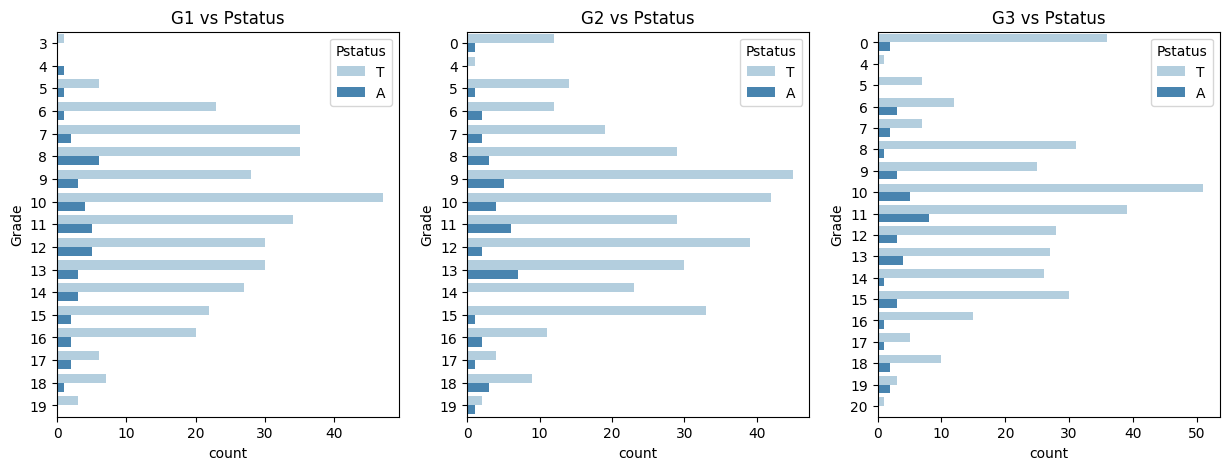

In [16]:
# Membuat subplot dengan 1 baris dan 3 kolom, dengan setiap plot berbagi sumbu y
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Melakukan iterasi melalui periode nilai (G1, G2, G3) dan membuat plot
for i, grade_period in enumerate(['G1', 'G2', 'G3']):  # Melakukan loop untuk setiap kolom nilai
    sns.countplot(ax=axes[i], data=df, y=grade_period, hue="Pstatus", palette="Blues")
    # Membuat countplot untuk masing-masing periode nilai, dengan hue 'Pstatus' dan skema warna biru

    axes[i].set_title(f'{grade_period} vs Pstatus')  # Menambahkan judul pada setiap plot
    axes[i].set_ylabel("Grade")  # Menambahkan label untuk sumbu y pada setiap plot

# Menampilkan semua plot
plt.show()

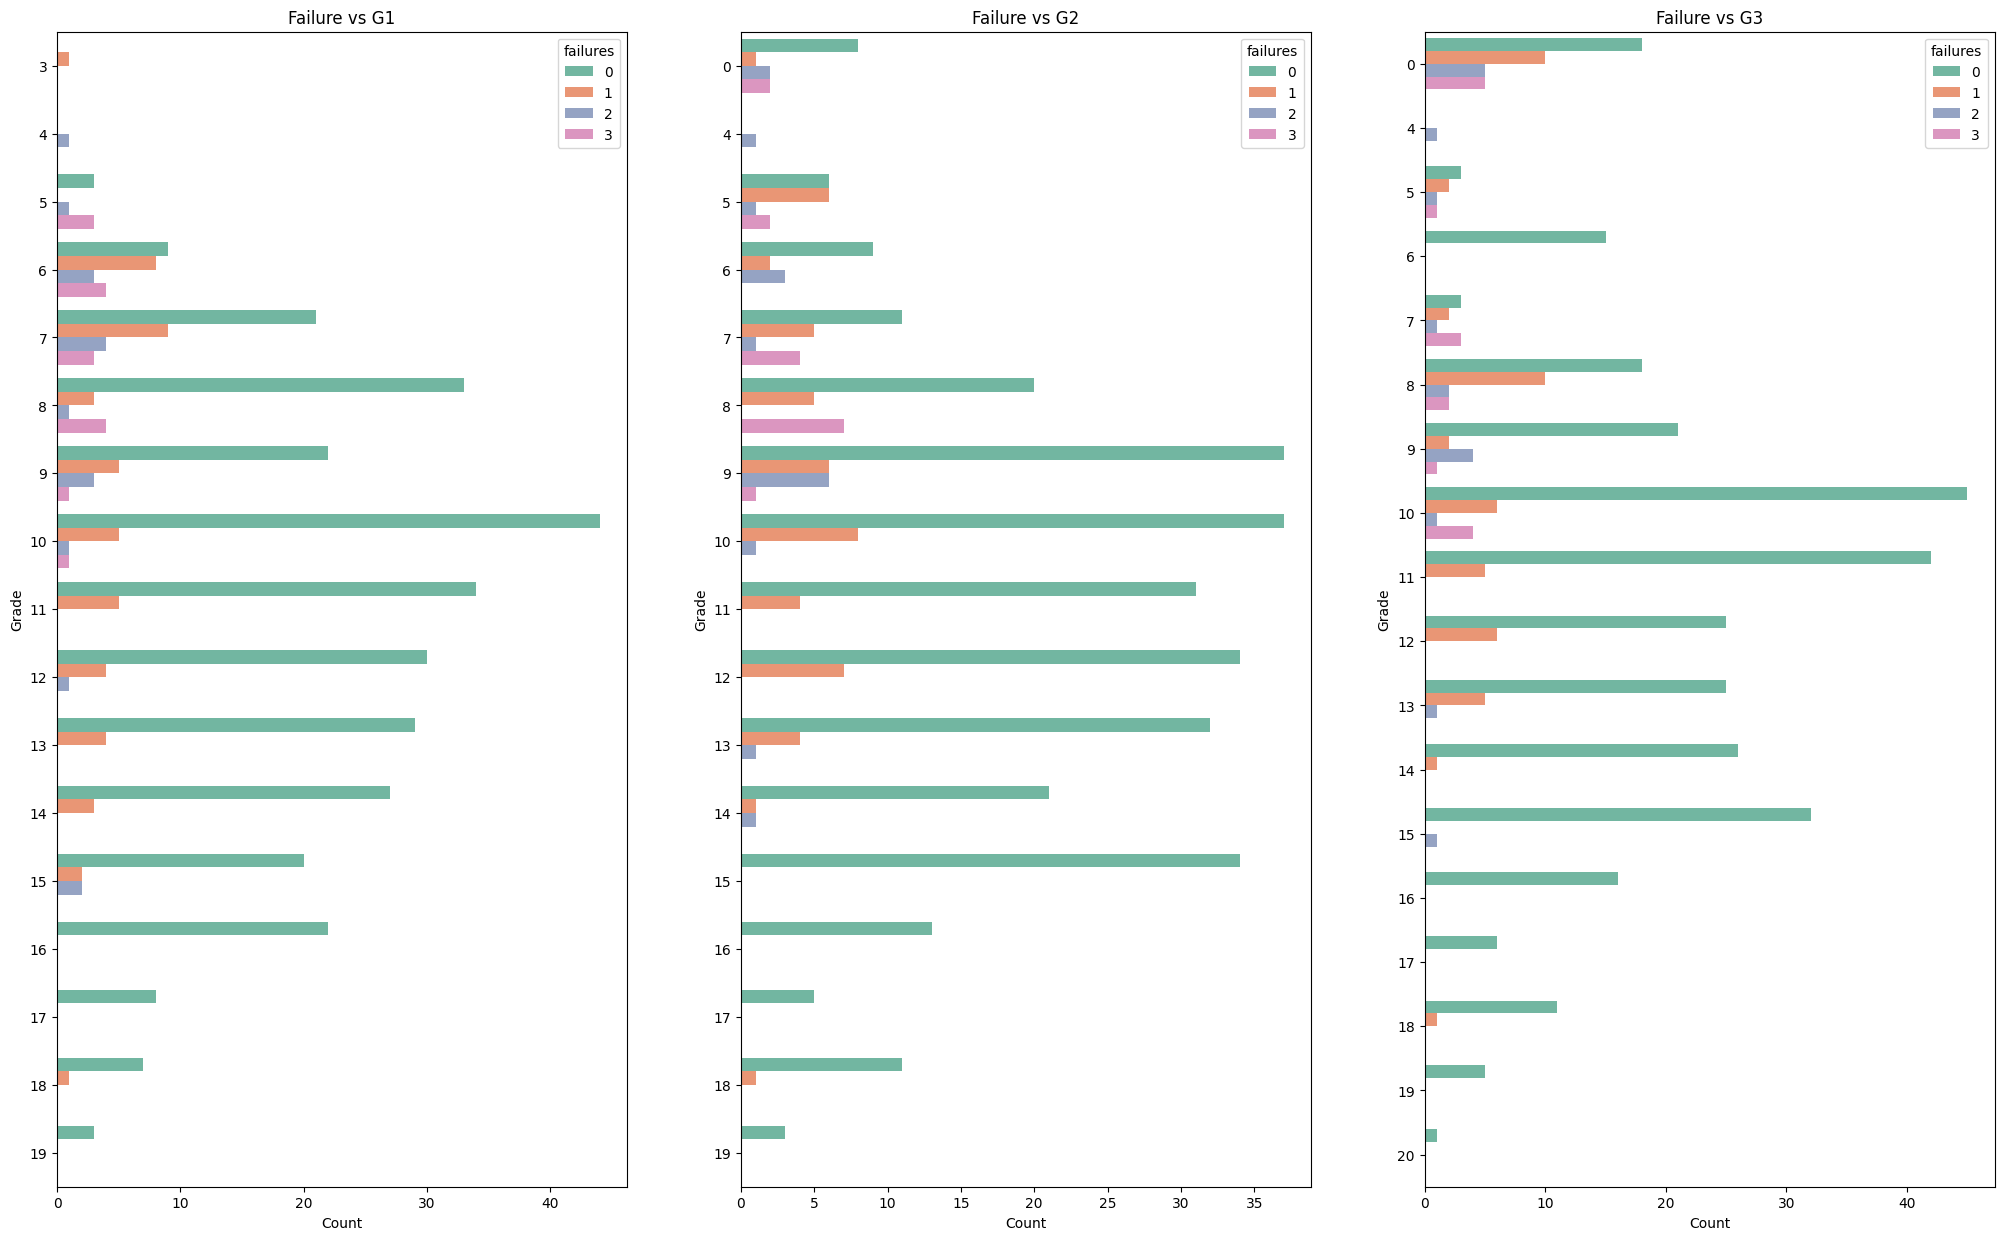

In [17]:
# Membuat subplot dengan 1 baris dan 3 kolom, serta menyesuaikan ukuran figure
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Melakukan iterasi melalui periode nilai (G1, G2, G3) dan membuat plot
for i, grade in enumerate(['G1', 'G2', 'G3']):  # Melakukan loop untuk setiap kolom nilai
    sns.countplot(data=df, y=grade, hue='failures', ax=axes[i], palette='Set2', dodge=True)
    # Membuat countplot untuk masing-masing periode nilai (G1, G2, G3)
    # dengan hue berdasarkan 'failures' dan skema warna 'Set2'

    axes[i].set_title(f'Failure vs {grade}')  # Menambahkan judul pada setiap subplot
    axes[i].set_ylabel('Grade')  # Menambahkan label untuk sumbu y
    axes[i].set_xlabel('Count')  # Menambahkan label untuk sumbu x

# Menampilkan semua plot
plt.show()

## Memisahkan Data yang Categorical dan Numerical

In [14]:
# Memilih kolom-kolom dengan tipe data 'object' (biasanya untuk data kategori/string) dari DataFrame df
cat_columns = df.select_dtypes(include = 'object').columns
# Menampilkan nama-nama kolom kategori yang ada
print(cat_columns)

# Membuat DataFrame baru df_cat yang hanya berisi kolom kategori dari df
df_cat = df[cat_columns]
# Menampilkan 5 baris pertama dari DataFrame df_cat untuk memeriksa data kategori
df_cat.head()

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [15]:
# Memilih kolom-kolom dengan tipe data numerik (seperti int atau float) dari DataFrame df
num_columns = df.select_dtypes([np.number]).columns
# Menampilkan nama-nama kolom numerik yang ada
print(num_columns)

# Membuat DataFrame baru df_num yang hanya berisi kolom numerik dari df
df_num = df[num_columns]
# Menampilkan 5 baris pertama dari DataFrame df_num untuk memeriksa data numerik
df_num.head()

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [16]:
# Menghitung jumlah kemunculan masing-masing nilai pada kolom 'age' dan menampilkan hasilnya
df['age'].value_counts()

,count
age,
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [17]:
# Melakukan iterasi untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Menampilkan nama kolom
    print(column)
    # Menampilkan jumlah kemunculan nilai unik pada kolom tersebut
    print(df[column].value_counts())
    # Menambahkan pemisah antar kolom untuk kejelasan
    print('----------------------------------')

school
school
GP    349
MS     46
Name: count, dtype: int64
----------------------------------
sex
sex
F    208
M    187
Name: count, dtype: int64
----------------------------------
age
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
----------------------------------
address
address
U    307
R     88
Name: count, dtype: int64
----------------------------------
famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64
----------------------------------
Pstatus
Pstatus
T    354
A     41
Name: count, dtype: int64
----------------------------------
Medu
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
----------------------------------
Fedu
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
----------------------------------
Mjob
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
--------------------------------

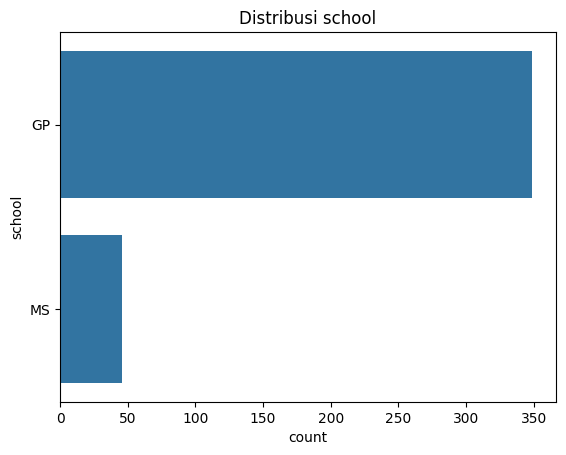

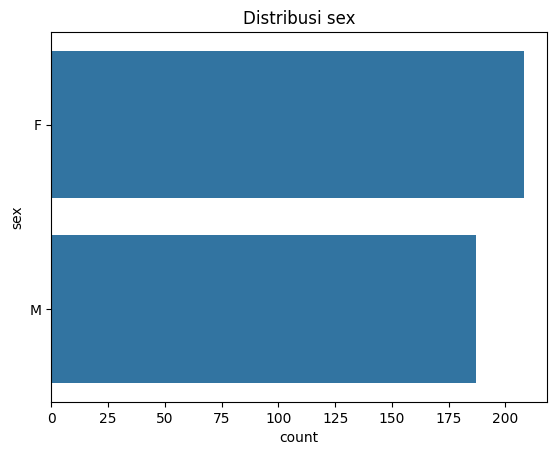

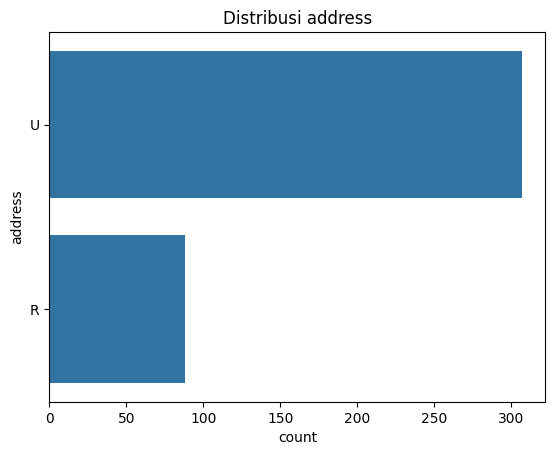

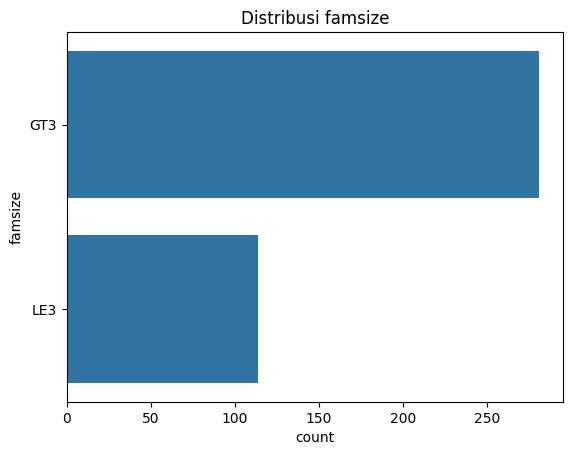

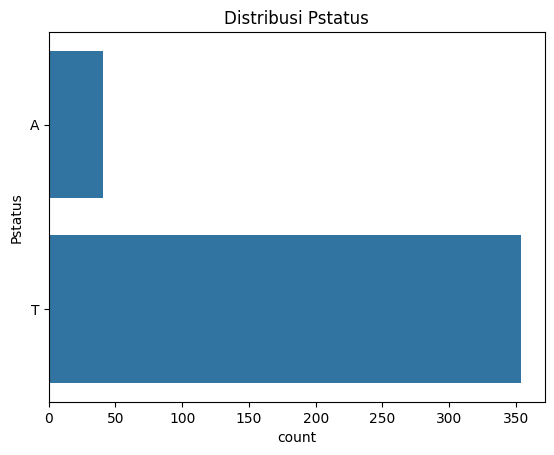

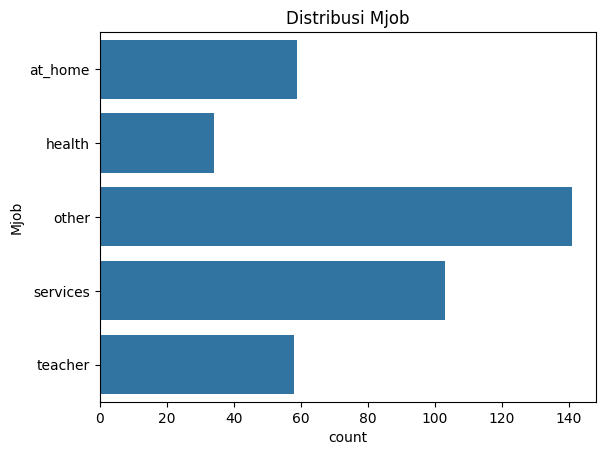

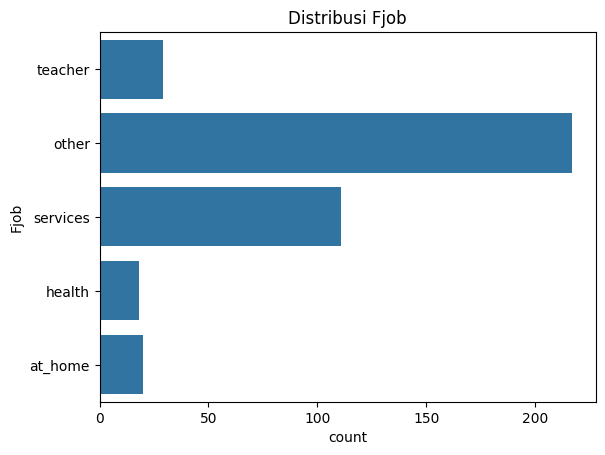

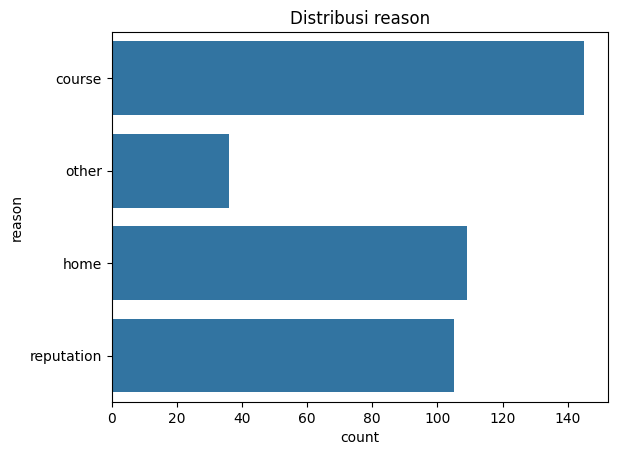

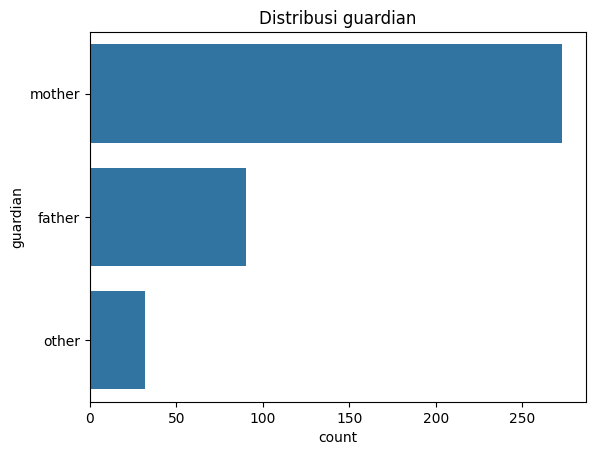

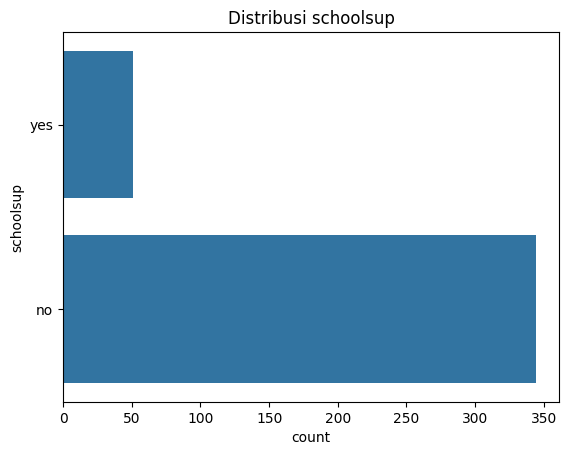

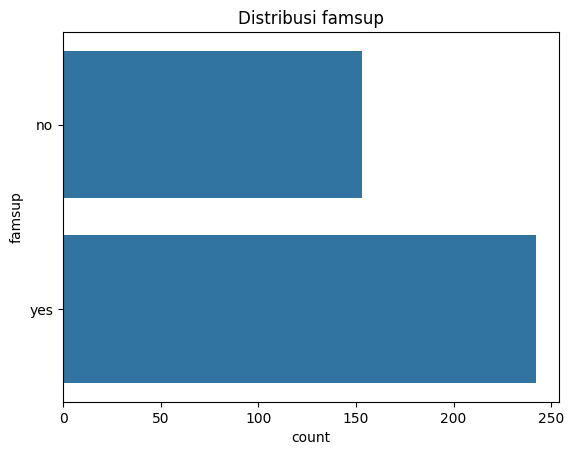

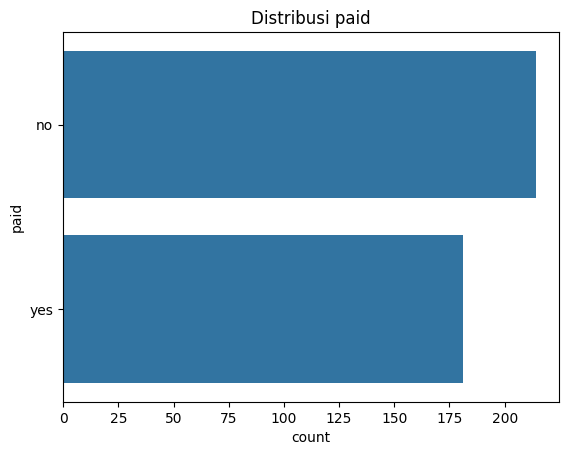

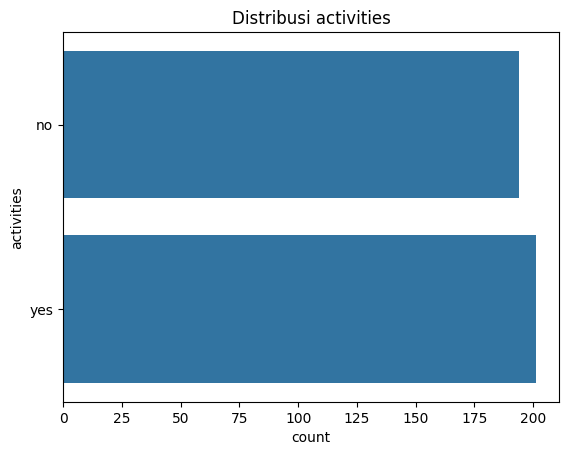

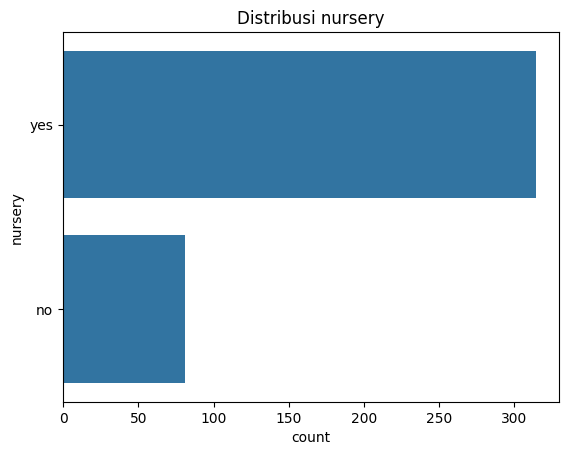

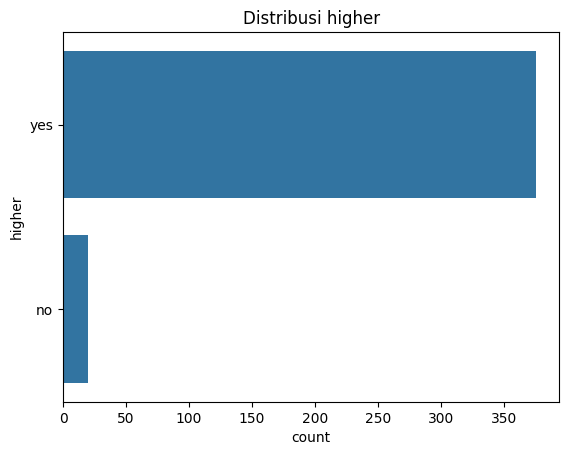

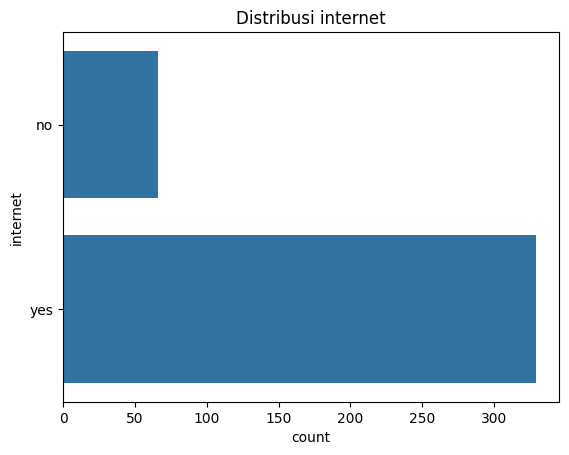

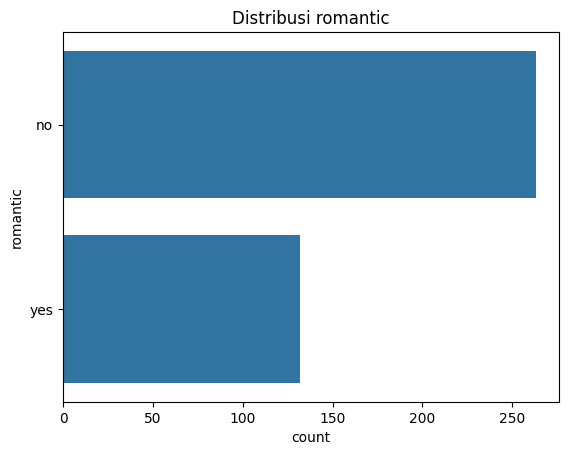

In [18]:
# Mengetahui jumlah tiap data unik pada semua kolom categorical dan menampilkan dalam bentuk bar chart
# Melakukan iterasi untuk setiap kolom categorical
for i, col in enumerate(cat_columns):
    # Membuat bar chart untuk distribusi nilai unik di kolom tersebut
    sns.countplot(y = col, data = df)
    # Memberikan judul pada grafik sesuai dengan nama kolom
    plt.title(f'Distribusi {col}')
    # Menampilkan grafik yang sudah dibuat
    plt.show()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

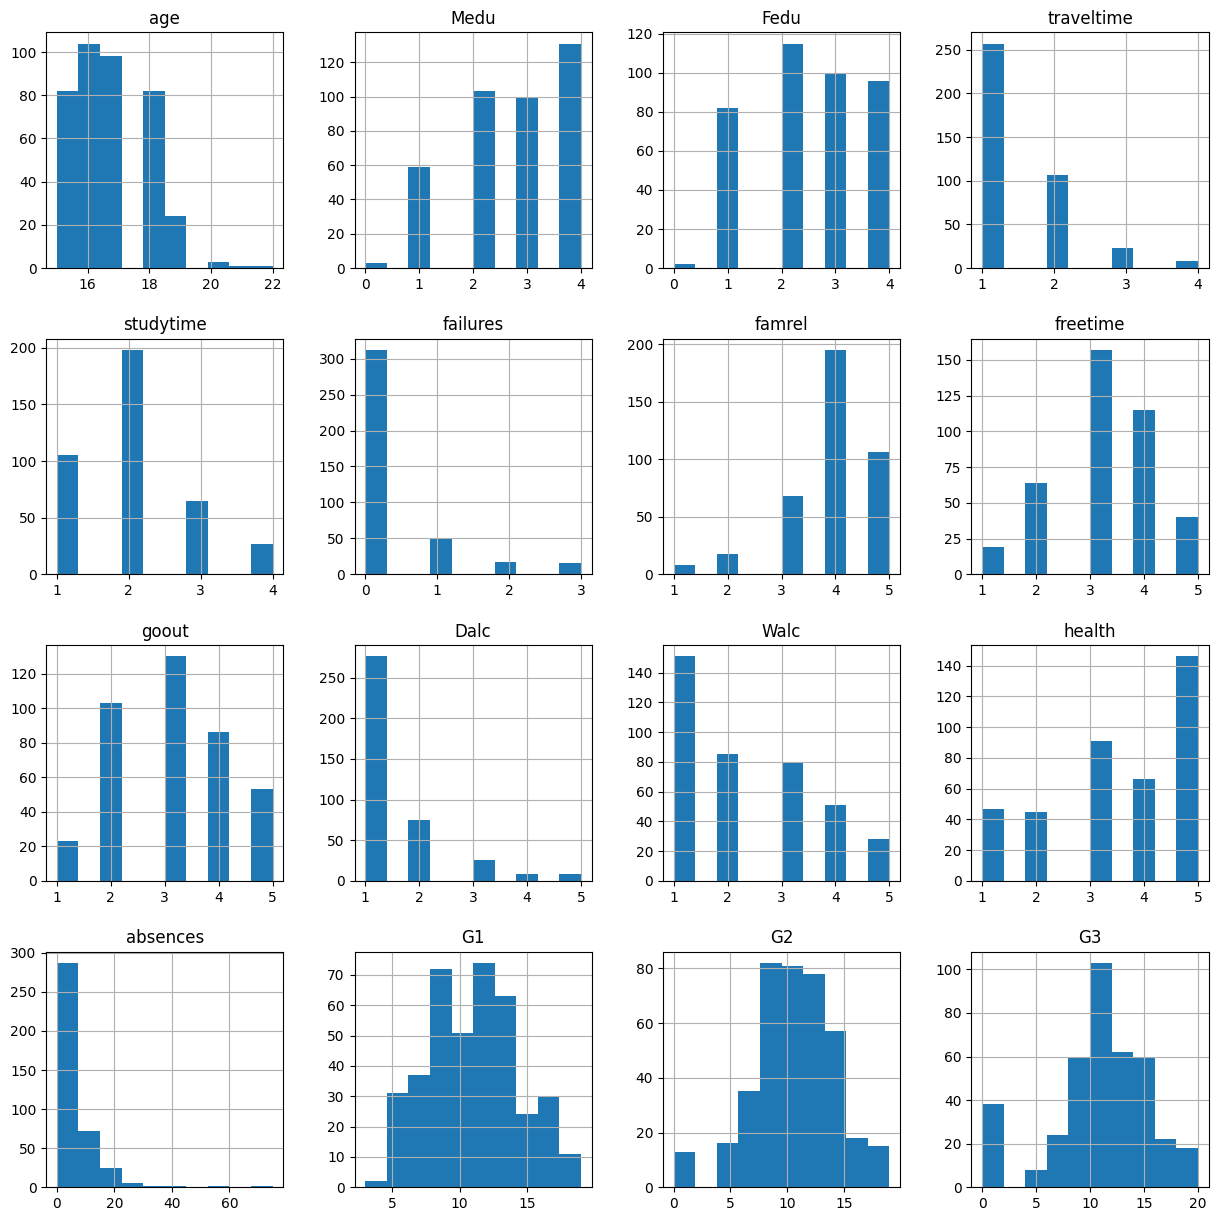

In [19]:
# Menampilkan histogram untuk semua kolom numerical dengan ukuran grafik 15x15 inci
df_num.hist(figsize = (15, 15))

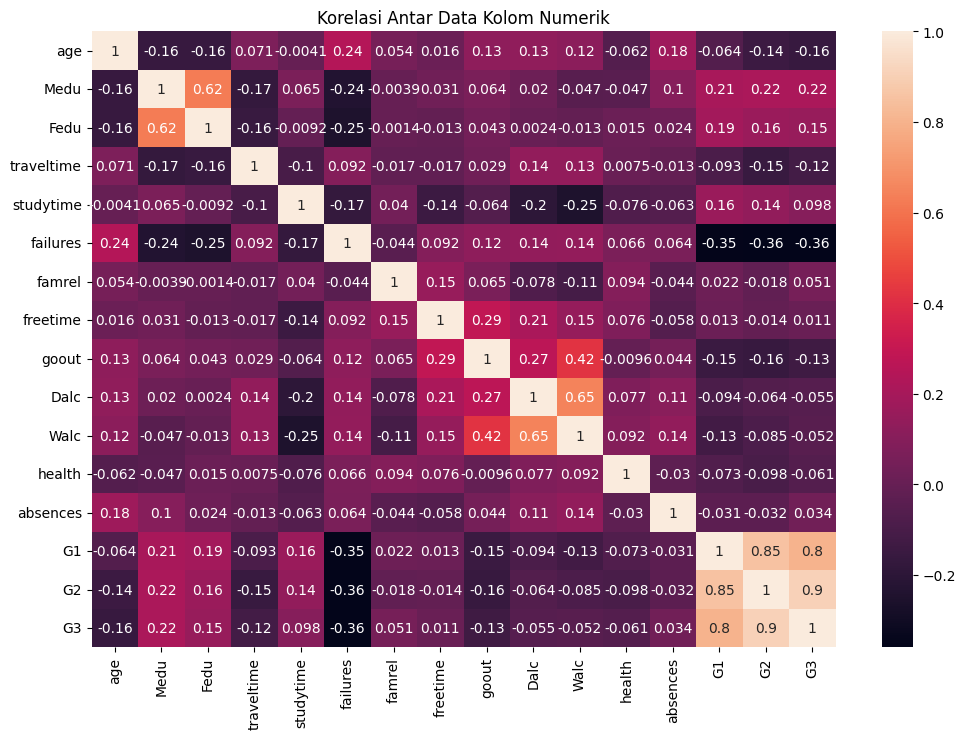

In [20]:
# Mengatur ukuran figure grafik menjadi 12x8 inci
plt.figure(figsize = (12, 8))

# Membuat heatmap untuk menunjukkan korelasi antar kolom numerik
# df_num.corr() menghitung matriks korelasi antar kolom numerik
# annot = True menampilkan nilai korelasi di dalam heatmap
sns.heatmap(df_num.corr(), annot = True)

# Menambahkan judul pada grafik
plt.title("Korelasi Antar Data Kolom Numerik")

# Menampilkan grafik
plt.show()

In [21]:
# Menghitung korelasi antar kolom numerik
corr_matrix = df_num.corr()

# Mengambil korelasi setiap kolom terhadap kolom 'G3'
corr_with_G3 = corr_matrix['G3'].sort_values(ascending=False)

# Menampilkan urutan korelasi kolom terhadap 'G3'
print(corr_with_G3)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


# Data Pre-Processing

## Menghilang Outliers pada Kolom Numerik yang Bukan Merupakan Angka Rating atau Jumlah

In [22]:
# Menentukan nama kolom yang ingin dianalisis
column = 'absences'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
q1 = np.percentile(df[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas
df_num_clean = df_num[(df_num[column] >= batas_bawah) & (df_num[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_num_clean.shape

-12.0
20.0


(380, 16)

In [23]:
# Menentukan nama kolom yang ingin dianalisis
column = 'age'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'age'
q1 = np.percentile(df_num_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_num_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'age'
df_num_clean = df_num_clean[(df_num_clean[column] >= batas_bawah) & (df_num_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_num_clean.shape

13.0
21.0


(379, 16)

In [24]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G1'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G1'
q1 = np.percentile(df_num_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_num_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G1'
df_num_clean = df_num_clean[(df_num_clean[column] >= batas_bawah) & (df_num_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_num_clean.shape

0.5
20.5


(379, 16)

In [25]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G2'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G2'
q1 = np.percentile(df_num_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_num_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G2'
df_num_clean = df_num_clean[(df_num_clean[column] >= batas_bawah) & (df_num_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_num_clean.shape

3.0
19.0


(366, 16)

In [26]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G3'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G3'
q1 = np.percentile(df_num_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_num_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G3'
df_num_clean = df_num_clean[(df_num_clean[column] >= batas_bawah) & (df_num_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_num_clean.shape

1.5
21.5


(341, 16)

In [27]:
# Menambahkan kolom baru 'GA' yang merupakan rata-rata dari kolom 'G1', 'G2', dan 'G3'
df_num_clean['GA'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Menampilkan 5 baris pertama dari dataframe setelah kolom 'GA' ditambahkan
df_num_clean.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,5.666667
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,5.333333
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,8.333333
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,14.666667
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,8.666667


# Scaling and Feature Selection

In [28]:
# Mengimpor library tambahan untuk scaling dan feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
# Menentukan variabel independen (fitur) X
# Menggunakan fitur 'G1', 'G2', dan 'failures' sebagai input untuk prediksi
X = df_num_clean[['G1', 'G2', 'failures']]

# Menentukan variabel dependen (target) y
# Menggunakan 'G3' sebagai target yang ingin diprediksi
y = df_num_clean['G3']

In [30]:
# SCALING: Standarisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Feature Selection menggunakan SelectKBest
k_best = SelectKBest(score_func=f_regression, k='all')  # Memilih semua fitur berdasarkan f_regression
X_selected = k_best.fit_transform(X_scaled, y)  # Menyaring fitur berdasarkan skor mereka terhadap target y

# Menampilkan skor fitur
print("Skor Fitur:")
for feature, score in zip(X.columns, k_best.scores_):
    print(f"{feature}: {score}")

Skor Fitur:
G1: 1297.2207395414366
G2: 4554.7082295059945
failures: 30.872153670447727


- G2 adalah fitur yang paling penting dalam model, sehingga memastikan data ini bersih dan relevan sangat krusial untuk meningkatkan akurasi.
- G1 juga berkontribusi besar, tetapi tidak sebesar G2.
- failures memiliki pengaruh kecil, sehingga dapat digunakan sebagai fitur tambahan, tetapi tidak krusial dalam model.

In [32]:
# FEATURE SELECTION: Memilih fitur terbaik berdasarkan nilai f-statistik
#selector = SelectKBest(score_func=f_regression, k=3)  # Memilih 3 fitur terbaik
#X_selected = selector.fit_transform(X_scaled, y)

# Data Splitting

In [33]:
# Mengimpor fungsi train_test_split untuk membagi dataset menjadi data pelatihan dan data uji
from sklearn.model_selection import train_test_split

In [34]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

## Function for Model Evaluation

In [35]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Melakukan prediksi

    # Menghitung metrik evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Fungsi MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(y_test, y_pred)  # Menghitung MAPE

    # Menampilkan hasil
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R-Squared: {r2:.4f}, MAPE: {mape:.2f}%")
    return mse, rmse, mae, r2, mape

## Model Selection: Linear Regression

In [36]:
# Evaluasi untuk Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

Linear Regression:
MSE: 0.6946, RMSE: 0.8334, MAE: 0.6415, R-Squared: 0.9275, MAPE: 5.87%


(0.6945696554337006,
 0.8334084565407893,
 0.641515419808129,
 0.9274814445280735,
 5.866965475558314)

## Model Selection: K-Nearest Neighbors

In [37]:
# Evaluasi untuk KNN
print("\nK-Nearest Neighbors:")
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, X_train, X_test, y_train, y_test)


K-Nearest Neighbors:
MSE: 0.9200, RMSE: 0.9592, MAE: 0.7449, R-Squared: 0.9039, MAPE: 7.16%


(0.92,
 0.9591663046625439,
 0.7449275362318839,
 0.9039447368421052,
 7.157895363138328)

## Model Selection: Decision Tree

In [38]:
# Evaluasi untuk Decision Tree
print("\nDecision Tree:")
dt_model = DecisionTreeRegressor(max_depth=5)
evaluate_model(dt_model, X_train, X_test, y_train, y_test)


Decision Tree:
MSE: 0.8199, RMSE: 0.9055, MAE: 0.6741, R-Squared: 0.9144, MAPE: 6.29%


(0.8198679460107002,
 0.9054655962601231,
 0.6740686256704563,
 0.9143993137948039,
 6.2907125773529735)

## Model Selection: Random Forest

In [39]:
# Evaluasi untuk Random Forest
print("\nRandom Forest:")
# Model Random Forest dengan 100 pohon
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)


Random Forest:
MSE: 0.7393, RMSE: 0.8598, MAE: 0.6735, R-Squared: 0.9228, MAPE: 6.19%


(0.7392880433086401,
 0.8598186107014898,
 0.6735426560789829,
 0.9228124917940256,
 6.1854546749116865)